# Master M2 MVA 2017/2018 - Graphical models - HWK 1

Sofiane Horache

NB: I apologize for the approximativ english but I think we can understand. Also, I often use the same letter for the random variable and the observation. I hope there is no ambiguity

## 1  Learning in discrete graphical models

Let $n \in \mathbb{N}$. $n$ is the number of sample.

Let $(x_i, z_i)$ , $i=1...n$ a iid sample of observations .
$\forall i, x_i \in \{1,..,K\}$ and $\forall i, z_i \in \{1,..,M\}$ where $K,M \in \mathbb{N}$.
We write $x=(x_i)_{i=1...n}$ and $z=(z_i)_{i=1...n}$
We have :

$$
p(z_i=m)=\pi_m
$$

and

$$
p(x_i=k|z_i=m)=\theta_{mk}
$$

Let's find the maximum log-likelihood estimator for $\pi$ and $\theta$. In other word,
let's find :
$$
(\hat{\pi}, \hat{\theta}) = \arg \max_{\pi,\theta}\log p_{\pi,\theta}(x,z)
$$
The sample is iid, so :
$$
\log p_{\pi,\theta}(x,z) = \sum_{i=1}^n\log p_{\pi,\theta}(x_i,z_i)
$$
We have :
$$
p_{\pi,\theta}(x_i,z_i) = p_{\pi,\theta}(x_i|z_i)p_{\pi,\theta}(z_i)
$$
But 
$$
 p_{\pi,\theta}(x_i=k|z_i=m)p_{\pi,\theta}(z_i=m) = \theta_{mk}\pi_{m}
$$
We note $$U_{m,k}^{(i)} = \mathbb{1}_{x_i=k, z_i=m}$$ We use one hot encoding.
So 
$$
p(U_{m,k}^{(i)}=1)= p_{\pi,\theta}(x_i=k|z_i=m)p_{\pi,\theta}(z_i=m) = \theta_{mk}\pi_{m}
$$
and 
$$
p(U^{(i)}=u^{(i)})=\prod_{k,m}(\theta_{mk}\pi_{m})^{u_{m,k}^{(i)}}
$$
If we use the one-hot encoding for $u^{i}$ we infer that :
$$
p_{\pi,\theta}(x_i,z_i)=p_{\pi,\theta}(u^{(i)})=\prod_{k,m}(\theta_{mk}\pi_{m})^{u_{m,k}^{(i)}}
$$
So
\begin{align}
\log p_{\pi,\theta}(x,z) &= \sum_{i=1}^n \sum_{k,m} u_{m,k}^{(i)}(\log (\theta_{mk})+ \log (\pi_m))\\
                         &= \sum_{k,m} \alpha_{m,k}(\log (\theta_{mk})+ \log (\pi_m))
\end{align}

Where :
$$
\alpha_{m,k} = \sum_{i=1}^n u_{m,k}^{(i)}
$$
So we want to compute
$$
\arg \max_{\theta, \pi} \sum_{k,m} \alpha_{m,k}(\log (\theta_{mk})+ \log (\pi_m))
$$
wrt
\begin{align}
\sum_{k,m}\theta_{mk} &= 1\\
 \sum_{m}\pi_m &= 1
\end{align}

We can notice that this is a concave otimization problem with constraint(the sum of concave function is concave) the function is coercive so this function has only one global maximum .
We'll use the lagrangian to solve this problem.
We pose:
$$
L(\theta, \pi, \mu, \nu) =\sum_{k,m} \alpha_{m,k}(\log (\theta_{mk})+ \log (\pi_m)) + \mu (1-\sum_{k,m}\theta_{mk}) + \nu (1-\sum_{m}\pi_m)
$$
$L$ is differentiable and
$$
\frac{\partial L}{\partial \theta_{mk}}(\theta, \pi, \mu, \nu) = \frac{\alpha_{m,k}}{\theta_{mk}} - \mu
$$
and
$$
\frac{\partial L}{\partial \pi_{m}}(\theta, \pi, \mu, \nu) = \frac{\sum_k\alpha_{m,k}}{\pi_{m}} - \nu
$$
We have 
$$
(\hat{\pi}, \hat{\theta}) = \arg \max_{\pi,\theta}\log p_{\pi,\theta}(x,z)
$$
if and only if
$$
\nabla L((\hat{\pi}, \hat{\theta}),\mu,\nu)=0
$$
so
$$
\hat{\theta_{mk}}= \frac{\alpha_{m,k}}{\mu}
$$
and
$$
\hat{\pi_m} = \frac{\sum_k\alpha_{m,k}}{\nu}
$$
but $\mu$ an $\nu$ must satisfy the constraint ie:
\begin{align}
\sum_{k,m}\hat{\theta_{mk}} &= \sum_{k,m} =\frac{\alpha_{m,k}}{\mu}= 1\\
 \sum_{m}\hat{\pi_m} &= \sum_m \frac{\sum_k\alpha_{m,k}}{\nu} = 1
\end{align} 
Therefore
$$
\mu=\nu=\sum_{k,m} \alpha_{m,k} = n
$$
We conclude that the maximum likelihood is
\begin{align}
\hat{\theta_{mk}}&=\frac{\alpha_{m,k}}{n}\\
\hat{\pi_m}&=\frac{\sum_{k}\alpha_{m,k}}{n}
\end{align}
We remind that $\alpha_{m,k}$ is how many couple $(x_i, z_i)$ is equal to $(k,m)$
## 2 Linear classification




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
%matplotlib inline 

/usr/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# Data for training
dataA = pd.read_csv('./classification_data_HWK1/classificationA.train', sep='\t', header=None).as_matrix()
dataB = pd.read_csv('./classification_data_HWK1/classificationB.train', sep='\t', header=None).as_matrix()
dataC = pd.read_csv('./classification_data_HWK1/classificationC.train', sep='\t', header=None).as_matrix()
# Data for the test
testA = pd.read_csv('./classification_data_HWK1/classificationA.test',sep='\t', header=None).as_matrix()
testB = pd.read_csv('./classification_data_HWK1/classificationB.test',sep='\t', header=None).as_matrix()
testC = pd.read_csv('./classification_data_HWK1/classificationC.test',sep='\t', header=None).as_matrix()


In [3]:
def separ(data):
    """this function separates the data above in a matrix X and a vector y"""
    return data[:,:-1], data[:,-1]



### Generative model LDA

#### a) MLE of LDA

#### b) conditional distribution $p(y=1|x)$

#### c) implementation

In [32]:
#function of conditionnal distribution
def cond_distrib(x,w, b, pi):
    
    return 1.0/(1.0+(1-pi)/pi*np.exp(-(w.dot(x)+b)))

# computation of estimated parameters
def MLE_LDA(data):
    """This function computes the best estimator for the LDA. The input is the matrix [X,y] it returns mu0, mu1, pi and sigma. T"""
    X_train, y_train = separ(data)
    
    #estimated parameters
    n = y_train.shape[0]
    mu1 = np.sum(X_train[y_train==1],axis=0)/n
    mu0 = np.sum(X_train[y_train==0],axis=0)/n
    mu = np.sum(X_train,axis=0)/n
    pi = float(np.count_nonzero(y_train))/n
    
    sigma = np.zeros((2,2))
    Xc = X_train[y_train==0] - mu0
    for x in Xc:
        x= np.array([x]).T
        sigma += x.dot(x.T)
    sigma /= X_train[y_train==0].shape[0]
    
    Xc = X_train[y_train==1] - mu1
    for x in Xc:
        x= np.array([x]).T
        sigma += x.dot(x.T)
    sigma /= X_train[y_train==1].shape[0]
    #sigma = np.linalg.inv(sigma)
    #w = sigma.dot(mu1 -mu0)
    #b = mu0.dot(sigma.dot(mu0))-mu1.dot(sigma.dot(mu1))
    return mu0, mu1, sigma, pi
mu0, mu1, sigma, pi = MLE_LDA(dataA)
print(mu0)
print(mu1)
print(sigma)

def fit_LDA(data):
    """learn the parameter w and b and pi thanks to the MLE of LDA"""
    mu0, mu1, sigma, pi = MLE_LDA(data)
    siginv = np.linalg.inv(sigma)
    w = siginv.dot(mu1-mu0)
    b = 0.5*(mu0.dot(siginv.dot(mu0))-mu1.dot(siginv.dot(mu1)))
    return w,b, pi

def sep_LDA(w,b,pi,x):
    return 1.0/w[1] * (np.log((1-pi)/pi)-b-w[0]*x)
def plot_data_LDA(data,title):
    X_train, y_train = separ(data)
    x1 = X_train[y_train==1][:,0]
    y1 = X_train[y_train==1][:,1]
    x0 = X_train[y_train==0][:,0]
    y0 = X_train[y_train==0][:,1]
    
    w,b,pi = fit_LDA(data)
    xline = np.linspace(-6.0,6.0,5)
    yline = sep_LDA(w,b,pi,xline)
  
    p1 = plt.scatter(x0,y0,c='r', label='y=0')
    p2 = plt.scatter(x1,y1,c='b', label= 'y=1')
    l, = plt.plot(xline,yline, c='black', label='separator')
    plt.title(title)
    plt.legend(handles=[p1,p2,l])
def predict_LDA(data, x):
    """this function apply the LDA algorithm to find parameters and classify one point"""
    w,b,pi = fit_LDA(data)
    proba = cond_distrib(x,w, b, pi)
    return proba>=0.5

[ 1.93313964 -0.595916  ]
[-0.89744001  0.28868067]
[[ 5.99091424 -2.36385546]
 [-2.36385546  1.03633325]]


[-1.35696607 -2.24162931]
0.358350763696
0.333333333333


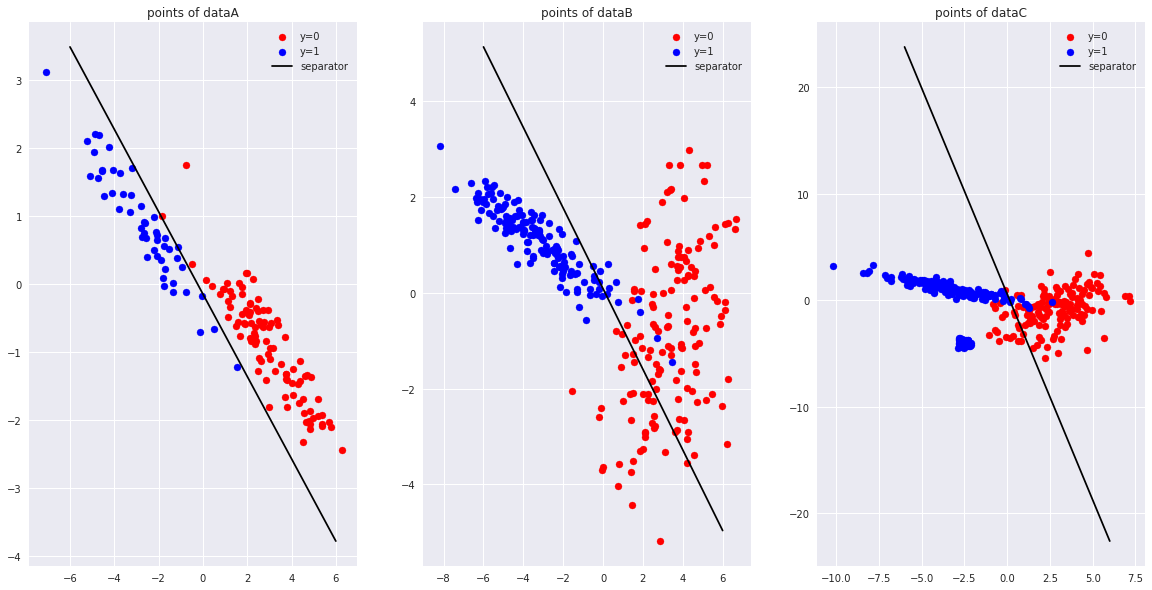

In [31]:

w,b, pi = fit_LDA(dataA)
print(w)
print(b)
print(pi)
plt.figure(figsize=[20,10])
plt.subplot('131')
plot_data_LDA(dataA,"points of dataA")
plt.subplot('132')
plot_data_LDA(dataB,"points of dataB")
plt.subplot('133')
plot_data_LDA(dataC,"points of dataC")

We conclude that for the data. The LDA classifier is really effective. Indeed, the training error is approximatly zero. Nevertheless, for the dataB and dataC, the LDA classifier gives poor results.

### 2 Logistic regression
Let $(x_i,y_i)_{i=1...n}$ be our sample of observations.$y_i\in\{0,1\}$, $x_i\in\mathbb{R}^2$. We call $\sigma$ the sigmoid function.
We aim at maximizing :
$$
f(\tilde{w}) =\sum_{i=1}^n y_i\tilde{w}^T\tilde{x}_i + \log (\sigma(-\tilde{w}^T\tilde{x}_i)) 
$$
where
$$
\forall i, \tilde{w}^T\tilde{x}_i = w^Tx_i+b
$$
We just have to add a column of one to the matrix X_train. To simplify the redaction we will not write the $\tilde{}$ anymore. 

so
$$
\nabla f(w) = \sum_{i=1}^n (y_i-\sigma(w^Tx_i))x_i
$$
The hessian is
$$
 Hf(w)=\sum_{i=1}^n -\sigma(w^Tx_i)(1-\sigma(w^Tx_i))x_ix_i^T
$$
So, f is concave. f is also coercive so f has a maximum and the maximum of f is unique

In [111]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))



def objective(data,w):
    """this function computes the objective function to maximize, its gradient and its hessian according to the
    data"""
    X_train, y_train = separ(data)
    one = np.array([np.ones(X_train.shape[0])]).T
    X=np.hstack((X_train,one))
    
    
    f = sum([y_train[i]*w.dot(X[i])+np.log(sigmoid(-w.dot(X[i]))) for i in range(X_train.shape[0])])
    eta = sigmoid(X.dot(w))
    
    grad = X.T.dot(y_train-eta)
    Deta = np.diag(eta*(1-eta))
    H=-X.T.dot(Deta.dot(X))
    
    
    return f, grad, H

def fit_logit(data, L):
    """this function compute the optimal parameter for the logistic regression, epsilon is a stop criterion"""
    shap = data.shape[1]
    w = np.zeros(shap) #initialisation
    f,grad,H = objective(data,w)
    Hinv = np.linalg.pinv(H)
    wp = (w-Hinv.dot(grad))
    
    
    for i in range(L):
        w = wp
        f,grad,H = objective(data,w)
        Hinv = np.linalg.pinv(H)
        wp = (w-Hinv.dot(grad))
    return w
def sep_logit(w,x):
    return 1.0/w[1]*(-w[0]*x-w[2])
def plot_data_logit(data,title):
    X_train, y_train = separ(data)
    x1 = X_train[y_train==1][:,0]
    y1 = X_train[y_train==1][:,1]
    x0 = X_train[y_train==0][:,0]
    y0 = X_train[y_train==0][:,1]
    
    w= fit_logit(data,10)
    
    xline = np.linspace(-3.0,3.0,5)
    yline = sep_logit(w,xline)
  
    p1 = plt.scatter(x0,y0,c='r', label='y=0')
    p2 = plt.scatter(x1,y1,c='b', label= 'y=1')
    l, = plt.plot(xline,yline, c='black', label='separator')
    plt.title(title)
    plt.legend(handles=[p1,p2,l])
    
def predict_logit(data, x):
    """this function use the logistic regression to find parameters and assign a label to a point"""
    w = fit_logit(data,10)
    xp = np.append(x,1)
    proba = sigmoid(xp.dot(w))
    return proba >=0.5

[-42.62610177 -73.02751747  -7.80183102]


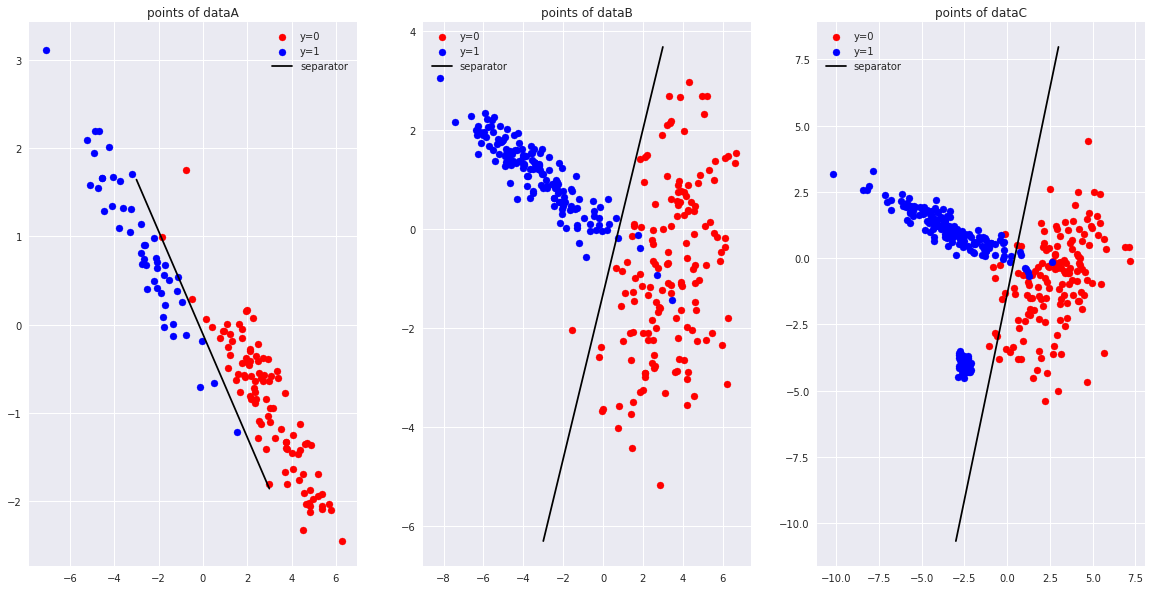

In [112]:
w = fit_logit(dataA,10)
print(w)

plt.figure(figsize=[20,10])
plt.subplot('131')
plot_data_logit(dataA,"points of dataA")
plt.subplot('132')
plot_data_logit(dataB,"points of dataB")
plt.subplot('133')
plot_data_logit(dataC,"points of dataC")


Conclusion : The logistic regression performs quite well but less precise for the dataA than the LDA. However, logistic regression is more robust. There is a warning for the exponential. For the parameters, we have more than one solution. We could add a Thikonov regularisation to select parameters that are not too big.

### 3 Linear regression





In [52]:
def fit_OLS(data):
    """this function take data and solve the normal equation to find an estimation of the parameters"""
    X_train, y_train = separ(data)
    one = np.array([np.ones(X_train.shape[0])]).T
    X=np.hstack((X_train,one))
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y_train)
def sep_OLS(w, x):
    return 1.0/(w[1])*(0.5-w[2]-w[0]*x)
def plot_data_OLS(data,title):
    X_train, y_train = separ(data)
    x1 = X_train[y_train==1][:,0]
    y1 = X_train[y_train==1][:,1]
    x0 = X_train[y_train==0][:,0]
    y0 = X_train[y_train==0][:,1]
    
    w= fit_OLS(data)
    
    xline = np.linspace(-6.0,6.0,5)
    yline = sep_OLS(w,xline)
  
    p1 = plt.scatter(x0,y0,c='r', label='y=0')
    p2 = plt.scatter(x1,y1,c='b', label= 'y=1')
    l, = plt.plot(xline,yline, c='black', label='separator')
    plt.title(title)
    plt.legend(handles=[p1,p2,l])

def predict_OLS(data,x):
    w = fit_OLS(data)
    xp = np.append(x,1)
    proba = w.dot(xp)
    return proba >=0.5

[-0.2640075  -0.37259311  0.49229204]


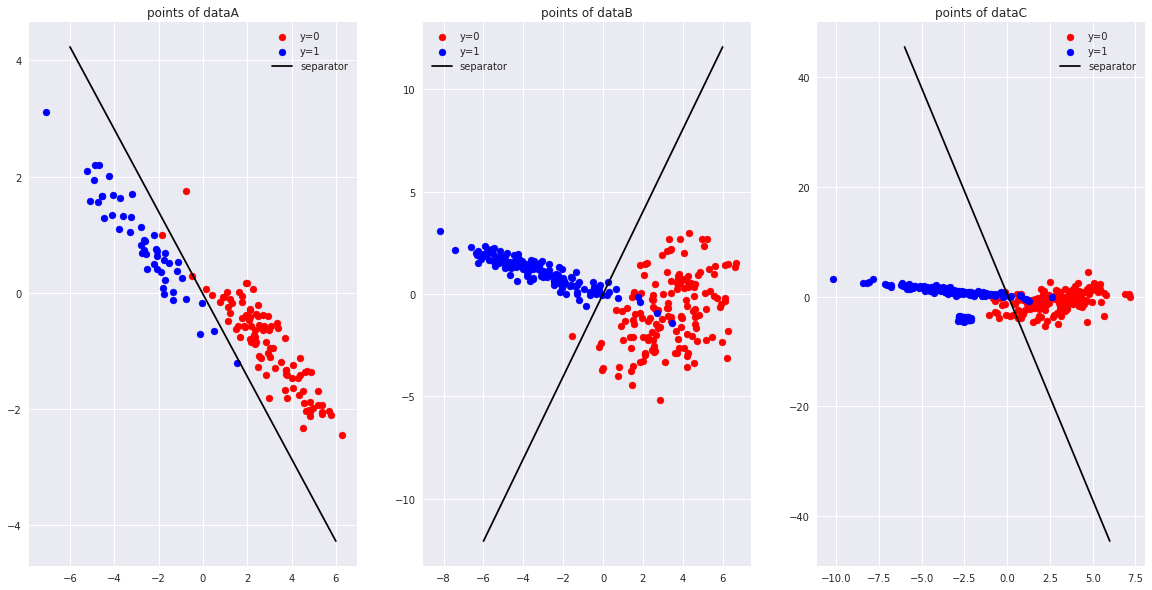

In [24]:
# values of parameters learnt for the linear regression
w = fit_OLS(dataA)
print(w)
plt.figure(figsize=[20,10])
plt.subplot('131')
plot_data_OLS(dataA,"points of dataA")
plt.subplot('132')
plot_data_OLS(dataB,"points of dataB")
plt.subplot('133')
plot_data_OLS(dataC,"points of dataC")

This method works quite well for binary classification. For the dataC logistic regression is better.

### 4 Tests

In [114]:
def predict(clf, data, X):
    y_pred = []
    for i in range(X.shape[0]):
        y = clf(data,X[i])
        y_pred.append(np.int(y))
    return y_pred
def score(y_true, y_pred):
    return np.float(np.sum(y_true==y_pred))/y_true.shape[0]

def print_result(data, test, clf, name_of_data):
    X_train, y_train = separ(data)
    X_test, y_test = separ(test)
    y1 = predict(clf, data, X_train)
    y2 = predict(clf, data, X_test)
    print("____________"+name_of_data+"_______________")
    print("accuracy of the classifier on the training set : %0.3f"%score(y_train,y1))
    print("accuracy of the classifier on the test set : %0.3f"%score(y_test,y2))

In [115]:
# for LDA classifier
# This is badly optimized so it can take some minutes.
print("------LDA classifier-------------")
print_result(dataA, testA, predict_LDA,"dataA")
print_result(dataB, testB, predict_LDA,"dataB")
print_result(dataC, testC, predict_LDA,"dataC")

print("------Logistic regression---------")
print_result(dataA, testA, predict_logit,"dataA")
print_result(dataB, testB, predict_logit,"dataB")
print_result(dataC, testC, predict_logit,"dataC")

print("------OLS-------------------------")
print_result(dataA, testA, predict_OLS,"dataA")
print_result(dataB, testB, predict_OLS,"dataB")
print_result(dataC, testC, predict_OLS,"dataC")

------LDA classifier-------------
____________dataA_______________
accuracy of the classifier on the training set : 0.993
accuracy of the classifier on the test set : 0.966
____________dataB_______________
accuracy of the classifier on the training set : 0.843
accuracy of the classifier on the test set : 0.829
____________dataC_______________
accuracy of the classifier on the training set : 0.930
accuracy of the classifier on the test set : 0.948
------Logistic regression---------
____________dataA_______________
accuracy of the classifier on the training set : 1.000
accuracy of the classifier on the test set : 0.965
____________dataB_______________
accuracy of the classifier on the training set : 0.980
accuracy of the classifier on the test set : 0.957
____________dataC_______________
accuracy of the classifier on the training set : 0.960
accuracy of the classifier on the test set : 0.977
------OLS-------------------------
____________dataA_______________
accuracy of the classifier on

Logistic regression and OLS have best result in comparison with LDA. for the dataA the result are approximatly the same for the three classifiers.
For the dataB, LDA gives poor result in comparaison with the other classifiers.
for the dataC The linear regression gives the best results. Both OLS and LDA, are influenced to much by the small blue class.

If we compare the separators, they all have the same separator approximatly for the dataset A. For the dataset B
the LDA separator is different from the logistic regression and the OLS separator. For the dataset C, the logistic regression has a different separator.

The separator is different because for the 3 classifier the assumptions are different:
-for the LDA, the assumption is really strong : data are gaussian with the same covariance
-for logistic regression : the only assumption is dataset is separable by a hyperplane
-for the OLS : the data are "linear".



### 5 QDA

In [117]:
def MLE_QDA(data):
    """This function computes the best estimator for the QDA. The input is the matrix [X,y] it returns mu0, mu1, pi, sigma0 and sigma1. T"""
    X_train, y_train = separ(data)
    
    #estimated parameters
    n = y_train.shape[0]
    mu1 = np.sum(X_train[y_train==1],axis=0)/n
    mu0 = np.sum(X_train[y_train==0],axis=0)/n
    mu = np.sum(X_train,axis=0)/n
    pi = float(np.count_nonzero(y_train))/n
    
    sigma0 = np.zeros((2,2))
    Xc = X_train[y_train==0] - mu0
    for x in Xc:
        x= np.array([x]).T
        sigma0 += x.dot(x.T)
    sigma0 /= X_train[y_train==0].shape[0]
    
    sigma1 = np.zeros((2,2))
    Xc = X_train[y_train==1] - mu1
    for x in Xc:
        x= np.array([x]).T
        sigma1 += x.dot(x.T)
    sigma1 /= X_train[y_train==1].shape[0]
    #sigma = np.linalg.inv(sigma)
    #w = sigma.dot(mu1 -mu0)
    #b = mu0.dot(sigma.dot(mu0))-mu1.dot(sigma.dot(mu1))
    return mu0, mu1, sigma0, sigma1, pi

def fit_QDA(data):
    """learn the parameter A, w and b and C thanks to the MLE of QDA"""
    mu0, mu1, sigma0, sigma1, pi = MLE_QDA(data)
    siginv0 = np.linalg.inv(sigma0)
    siginv1 = np.linalg.inv(sigma1)
    A = 0.5*(siginv0-siginv1)
    w = siginv1.dot(mu1)-siginv0.dot(mu0)
    b = 0.5*(mu0.dot(siginv0.dot(mu0))-mu1.dot(siginv1.dot(mu1)))
    C = np.float(1.0-pi)/pi * np.sqrt(np.linalg.det(sigma1)/np.linalg.det(sigma0))
    return A,w,b, C

def cond_distrib_QDA(x,A, w, b,C):
    
    return 1.0/(1+C*np.exp(-(x.dot(A.dot(x))+w.dot(x)+b)))


def plot_data_QDA(data,title):
    X_train, y_train = separ(data)
    x1 = X_train[y_train==1][:,0]
    y1 = X_train[y_train==1][:,1]
    x0 = X_train[y_train==0][:,0]
    y0 = X_train[y_train==0][:,1]
    
    A,w,b,C = fit_QDA(data)
    xl = np.linspace(-6.0,6.0,100)
    yl = np.linspace(-6.0,6.0,100)
    x,y = np.meshgrid(xl,yl)
    print(title)
    print(A)
    print(w)
    print(b)
    print(C)
    plt.contour(x, y,
                (A[0][0]*x**2+A[1][1]*y**2+x*y*(A[0][1]+A[1][0])+w[0]*x+w[1]*y+b-np.log(C)),
                [0],colors='k')
    
  
    p1 = plt.scatter(x0,y0,c='r', label='y=0')
    p2 = plt.scatter(x1,y1,c='b', label= 'y=1')
    plt.title(title)
    plt.legend(handles=[p1,p2])
def predict_QDA(data, x):
    """this function apply the QDA algorithm to find parameters and classify one point"""
    A,w,b,C = fit_QDA(data)
    proba = cond_distrib_QDA(x,A,w, b,C)
    return proba>=0.5

points of dataA
[[ 0.03889866 -0.15610656]
 [-0.15610656 -0.58527524]]
[-1.71634427 -2.38171185]
0.660337808733
2.53747626595
points of dataB
[[-0.59023854 -1.8772926 ]
 [-1.8772926  -5.5427028 ]]
[-0.50685835  0.34543868]
0.114181072531
0.188843178166
points of dataC
[[-0.0467334  -0.03554257]
 [-0.03554257  0.07702252]]
[-0.69766358 -0.07734011]
-0.417675896516
0.696493230311


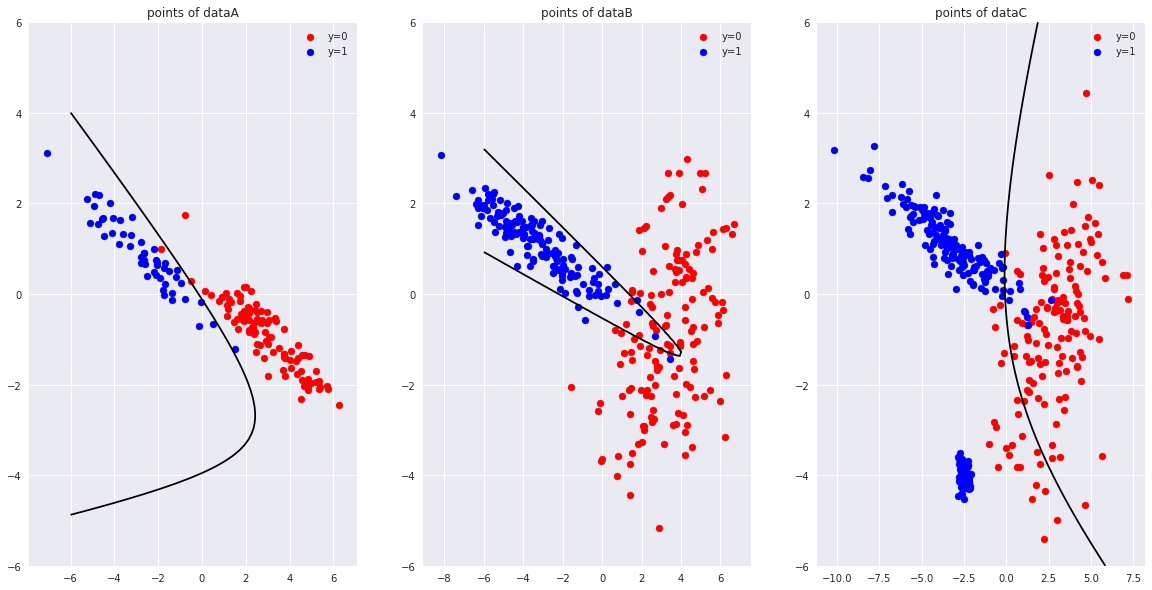

In [118]:
# Tracé des courbe
plt.figure(figsize=[20,10])
plt.subplot('131')
plot_data_QDA(dataA,"points of dataA")
plt.subplot('132')
plot_data_QDA(dataB,"points of dataB")
plt.subplot('133')
plot_data_QDA(dataC,"points of dataC")

In [116]:
print("------QDA classifier-------------")
print_result(dataA, testA, predict_QDA,"dataA")
print_result(dataB, testB, predict_QDA,"dataB")
print_result(dataC, testC, predict_QDA,"dataC")

------QDA classifier-------------
____________dataA_______________
accuracy of the classifier on the training set : 0.987
accuracy of the classifier on the test set : 0.980
____________dataB_______________
accuracy of the classifier on the training set : 0.953
accuracy of the classifier on the test set : 0.951
____________dataC_______________
accuracy of the classifier on the training set : 0.915
accuracy of the classifier on the test set : 0.929


The QDA has good results for the dataset A and B. for the dataset C the QDA is worse than the LDA.
For the dataset B , the QDA is adapted (gaussian distributions with different covariance matrices). The parabola fits well the border of the blue class.
For the dataset A, the border is nearly a line between the red and blue points but the small variation of the estimated covariances matrices gives the parabola. 